## Outline

This project uses the CRISP-DM framework. The following is an outline of machine learning on this notebook.
1. Data Understanding
    * Data Prepocessing
        * Load library
        * Load data
        * Merge all csv
        * Add offense name
        * Data type correction
    * Exploratory Data Analysis
        * Missing value checking
        * Data distribution checking
            * Numerical columns
                * statistics descriptive
                * histogram and boxplot
            * Categorical columns
                * univariate plot
                * bivariate plot
2. Data Preparation
    * Missing value handling
    * Drop duplicate rows
    * Feature selection & feature engineering
    * Make dataframe for prediction as question answer
    * One hot encoder
    * Train test split
3. Modeling
4. Evaluation
5. Predict question data

## CRISP-DM : DATA UNDERSTANDING

### A. Data Prepocessing

#### Load library

Load the libraries needed for this data analysis

In [1]:
# library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
from xgboost.sklearn import XGBRegressor

#### Load data

The data provided is divided into 3 csv files, namely data crime in 2018, 2019 and 2020.

In [2]:
df_18 = pd.read_csv('Crime2018.csv')
df_18.shape

(98888, 17)

In [3]:
df_19 = pd.read_csv('Crime2019.csv')
df_19.shape

(19782, 17)

In [4]:
df_20 = pd.read_csv('Crime2020.csv', dtype={'INCIDENT_NUMBER': object})
df_20.shape

(70894, 17)

Combine all the data into one master data crime. After that check the number of rows and columns whether it is correct in the merging process

#### Merge all data

In [5]:
df = df_18.append(df_19)
df = df.append(df_20)
df.shape

(189564, 17)

In [6]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)"
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)"
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)"
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)"
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)"


#### Load offense code data

In the given zip file, there is also an offense name data, we can add this offense name by combining it with the master data based on the offense code

In [7]:
offense_code = pd.read_excel('OffenseCode.xlsx')
offense_code.rename(columns={'CODE':'OFFENSE_CODE','NAME':'OFFENSE_NAME'}, inplace=True)
offense_code.head()

,OFFENSE_CODE,OFFENSE_NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


#### Merge with main data

In [8]:
print('shape before merge : ', df.shape)
df = df.merge(offense_code.drop_duplicates(subset ="OFFENSE_CODE", keep = 'first'), 
              on='OFFENSE_CODE',
              how='left')
print('shape before after : ', df.shape)

shape before merge :  (189564, 17)
shape before after :  (189564, 18)


In [9]:
df.to_csv('df_crime.csv', index=False)

#### Data type correction

After the master data merging process is complete, we make corrections to the data types that do not match. From df.info() we get the column OFFENSE_CODE, and OCCURRED_ON_DATE needs to be changed data type

In [10]:
display(df.head())
df.info()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,OFFENSE_NAME
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",INVESTIGATE PERSON
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",LARCENY ALL OTHERS
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",HARASSMENT
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",HARASSMENT
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",PROPERTY - MISSING


<class 'pandas.core.frame.DataFrame'>
Int64Index: 189564 entries, 0 to 189563
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      189564 non-null  object 
 1   OFFENSE_CODE         189564 non-null  int64  
 2   OFFENSE_CODE_GROUP   98888 non-null   object 
 3   OFFENSE_DESCRIPTION  189564 non-null  object 
 4   DISTRICT             188527 non-null  object 
 5   REPORTING_AREA       189564 non-null  object 
 6   SHOOTING             91078 non-null   object 
 7   OCCURRED_ON_DATE     189564 non-null  object 
 8   YEAR                 189564 non-null  int64  
 9   MONTH                189564 non-null  int64  
 10  DAY_OF_WEEK          189564 non-null  object 
 11  HOUR                 189564 non-null  int64  
 12  UCR_PART             98868 non-null   object 
 13  STREET               187948 non-null  object 
 14  Lat                  183135 non-null  float64
 15  Long             

In [11]:
df['OFFENSE_CODE'] = df['OFFENSE_CODE'].astype(object)
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

Furthermore, E.D.A is carried out as a basis for data preparation and also to find hidden insights from data

### B. Exploratory Data Analysis (E.D.A)

#### 1. Missing value checking

First, it is necessary to check the missing value process, this is needed to determine the appropriate action for the imputation process for the missing value. Does it need to be dropped, or does it need to be imputed by what method

In [12]:
# define function for checking missing value
def check_missing(df):
    percent=df.isnull().sum()/df.shape[0]*100
    freq=df.isnull().sum()
    types=df.dtypes
    df_miss=pd.DataFrame({'percentage':percent, 'frequency':freq, 'var_type':types})
    df_miss.sort_values(by='frequency',ascending= False, inplace=True)
    return df_miss[df_miss['percentage']>0]

In [13]:
df.columns = [x.lower() for x in df.columns]
check_missing(df)

,percentage,frequency,var_type
shooting,51.953958,98486,object
ucr_part,47.844527,90696,object
offense_code_group,47.833977,90676,object
long,3.391467,6429,float64
lat,3.391467,6429,float64
offense_name,3.151442,5974,object
street,0.852483,1616,object
district,0.547045,1037,object


"shooting" has a value of 1 & 0, because there is a missing value, it is assumed that the missing is not shooting, meaning that the missing value d is changed to "0"

ucr_part, offense_code_group, offense_name, street and district missing values will be replaced with "Other"

while long and lat will be dropped because they are not needed for modeling

The execution of the explanation will be carried out in the "Data Preparation" step

#### 2. Checking Data Distribution

First, check the distribution of numerical data, using
1. descriptive statistics
2. distribution of data using histograms and outliers

#### a. Numerical columns

In [14]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,offense_name
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",INVESTIGATE PERSON
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",LARCENY ALL OTHERS
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",HARASSMENT
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",HARASSMENT
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",PROPERTY - MISSING


#### Statistics of all columns

In [15]:
# check the central tendency of data
df.describe()

,year,month,hour,lat,long
count,189564.000000,189564.000000,189564.000000,183135.000000,1.831350e+05
mean,2018.852324,7.022757,12.928557,41.759070,-7.014292e+01
std,0.934795,3.488644,6.359623,4.856312,8.115174e+00
min,2018.000000,1.000000,0.000000,-1.000000,-7.117867e+01
25%,2018.000000,4.000000,9.000000,42.296042,-7.109780e+01
50%,2018.000000,7.000000,14.000000,42.325559,-7.107732e+01
75%,2020.000000,10.000000,18.000000,42.348132,-7.106134e+01
max,2020.000000,12.000000,23.000000,42.395042,5.249691e-08


Let's focus on the hour column because that's what we want to predict

The average crime occurs at 12-14 PM

The mean and median are not much different, indicating that the data has a normal distribution. But this is still an initial assumption, we need to check using histogram and boxplot

#### Target variable distribution

Text(0.5, 1.0, 'Hour Distribution')

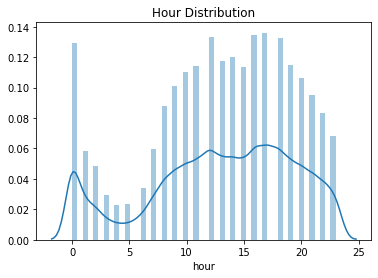

In [16]:
# lets see the distribution of hour using histogram
sns.distplot(df['hour']).set_title('Hour Distribution')

It turns out that the hour data has a bimode distribution, where there are two data centers, namely at 00.00 AM and 12-14 PM. This means that crime is prone to occur at that hour.

Text(0.5, 1.0, 'Hour Distribution')

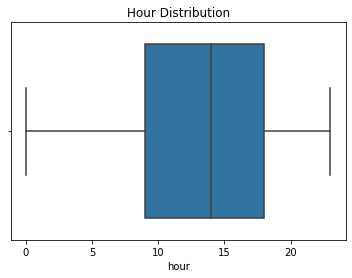

In [17]:
# lets see the distribution of EPL team using histogram
sns.boxplot(df['hour']).set_title('Hour Distribution')

From the boxplot, it can be seen that there is no indication of anomalous events, because there are no outliers

#### b. Categorical columns

Next, let's examine the distribution of categorical data

In [18]:
df.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,offense_name
0,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,NaN,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",INVESTIGATE PERSON
1,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,NaN,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",LARCENY ALL OTHERS
2,I192076660,2629,Harassment,HARASSMENT,E5,662,NaN,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",HARASSMENT
3,I192075386,2629,Harassment,HARASSMENT,A1,96,NaN,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",HARASSMENT
4,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,NaN,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",PROPERTY - MISSING


#### Unique count values

In [19]:
import math
categorical_feature = ['offense_name','offense_code_group','district','shooting','year','month','day_of_week','hour','street']

for col in categorical_feature:
    print('number unique value of',col,'==>', df[col].nunique())

number unique value of offense_name ==> 185
number unique value of offense_code_group ==> 61
number unique value of district ==> 13
number unique value of shooting ==> 3
number unique value of year ==> 3
number unique value of month ==> 12
number unique value of day_of_week ==> 7
number unique value of hour ==> 24
number unique value of street ==> 10230


offense_name and street have a lot of unique values, for now we have not used these columns, because they have the potential to cause too many columns after the one hot encoder process, resulting in a potential curse of dimensionality.

#### Top 20 Offense Group

<AxesSubplot:>

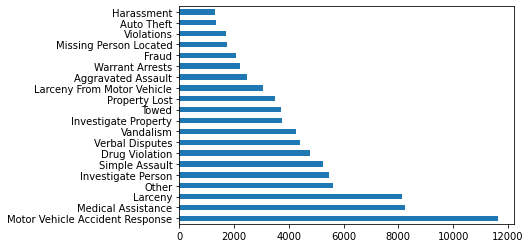

In [20]:
temp = df.offense_code_group.value_counts()
temp2 = temp.head(20)
temp2.plot(kind='barh')

Common types of cases include:
1. motorcycle vechicle accident
2. medical assistance
3. larceny
4. drug violation
5. etc
If it is concluded that the large category is related to the health sector and criminal violence.

For details on the names of cases that often occur, see the top 20 offense names chart

#### Top 20 Offense Name

<AxesSubplot:>

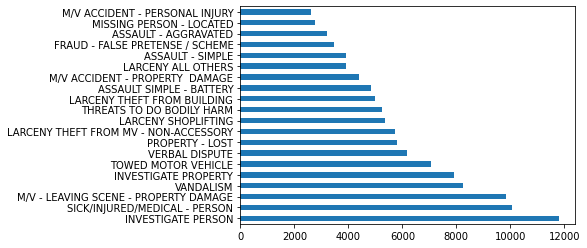

In [21]:
temp = df.offense_name.value_counts()
temp2 = temp.head(20)
temp2.plot(kind='barh')

#### Number of event across district

<AxesSubplot:>

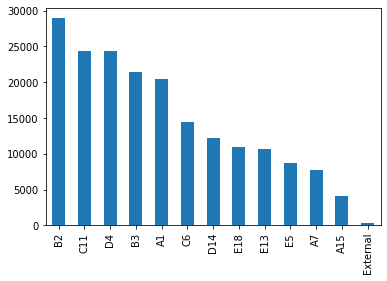

In [22]:
temp = df.district.value_counts()
temp2 = temp.head(20)
temp2.plot(kind='bar')

In terms of area, the most crimes occurred in the B2 district, while the least was in the external district

#### Shooting

<AxesSubplot:>

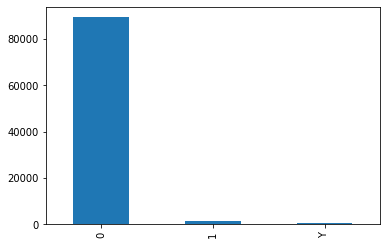

In [23]:
temp = df.shooting.value_counts()
temp2 = temp.head(20)
temp2.plot(kind='bar')

From the data we have, shooting cases are rare.

It can be seen that there are categories Y and 1, these are actually the same. So it needs to be corrected during data preparation

#### Yearly Crime

<AxesSubplot:xlabel='index'>

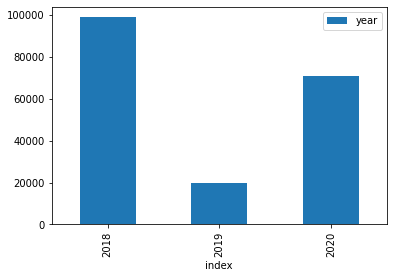

In [24]:
temp = df.year.value_counts()
temp.reset_index().sort_values(by='index').set_index('index').plot(kind='bar')

In 2018 the crime rate was the highest, but in 2019 it was quite small, then slowly rose again in 2020

#### Monthly Crime

<AxesSubplot:xlabel='index'>

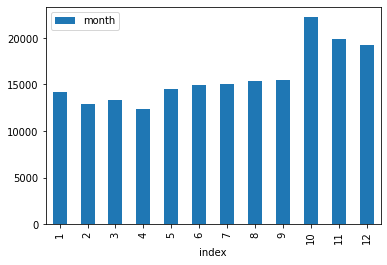

In [25]:
temp = df.month.value_counts()
temp.reset_index().sort_values(by='index').set_index('index').plot(kind='bar')

Crime is generally high towards the end of the year starting from October, November, and December. While other months are relatively the same.

#### Weekly Crime

<AxesSubplot:xlabel='index'>

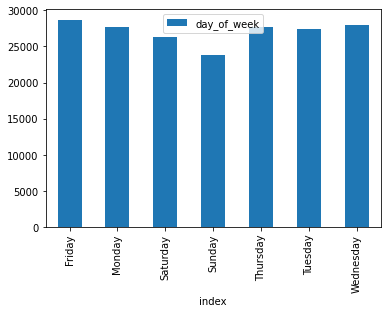

In [26]:
temp = df.day_of_week.value_counts()
temp.reset_index().sort_values(by='index').set_index('index').plot(kind='bar')

When viewed by day, all days are relatively the same level of crime

#### Hourly Crime

<AxesSubplot:xlabel='index'>

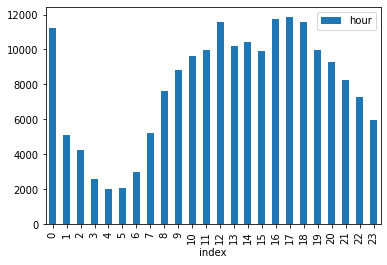

In [27]:
temp = df.hour.value_counts()
temp.reset_index().sort_values(by='index').set_index('index').plot(kind='bar')

It turns out that the hour data has a bimode distribution, where there are two data centers, namely at 00.00 AM and 12-14 PM. This means that crime is prone to occur at that hour.

#### Top 20 Crime by Street

<AxesSubplot:>

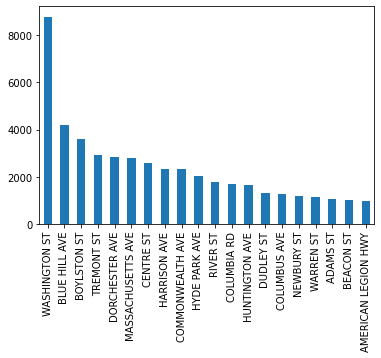

In [28]:
temp = df.street.value_counts()
temp2 = temp.head(20)
temp2.plot(kind='bar')

The most crimes occurred in washington st, etc. can be seen on the chart

#### Crime by Hour Everyday

<AxesSubplot:xlabel='hour', ylabel='day_of_week'>

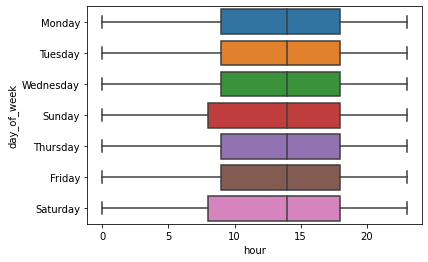

In [29]:
sns.boxplot(y='day_of_week',x='hour',data=df)

When viewed from the time it occurs every day, it is relatively the same, namely the average generally occurs at 12-14 PM

#### Correlation Analysis

In [30]:
def numerical(df):
    num=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='float64'])
    return num
NUMERIC_FITUR = numerical(df.drop(columns=['lat','long'], axis=1))

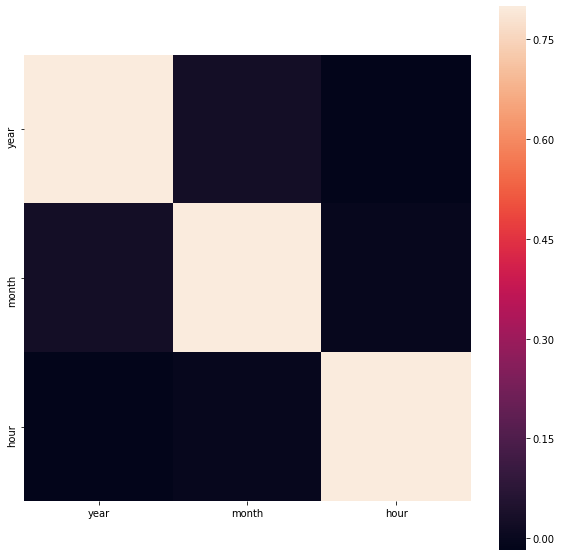

In [31]:
corrmat=df[NUMERIC_FITUR].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

It can be seen from all the numerical variables that there is no correlation, meaning that there is no multicollinearity

The next step is to do data preparation for the step before modeling

## CRISP-DM : DATA PREPARATION

#### Missing value handling

As found before, we can do :
    
"shooting" has a value of 1 & 0, because there is a missing value, it is assumed that the missing is not shooting, meaning that the missing value d is changed to "0"

ucr_part, offense_code_group, offense_name, street and district missing values will be replaced with "Other"

while long and lat will be dropped because they are not needed for modeling

In [32]:
df['shooting'].fillna(0, inplace=True)
df['shooting'] = df['shooting'].replace({'Y' : 1}, regex=True)

df['ucr_part'].fillna('Other', inplace=True)
df['offense_code_group'].fillna('Other', inplace=True)
df['offense_name'].fillna('Other', inplace=True)
df['street'].fillna('Other', inplace=True)
df['district'].fillna('Other', inplace=True)

df.drop(columns=['long','lat'], axis=1, inplace=True)

check_missing(df)

,percentage,frequency,var_type


In [33]:
df.to_csv('df_crime_new.csv', index=False)

#### Checking duplicated rows

Then it is necessary to check whether there is duplication of data, it is found that there are 161 duplicate rows, and it needs to be dropped

In [34]:
df.duplicated().sum()

161

In [35]:
df = df.drop_duplicates()

#### Selecting necessary feature

The selection of features that will be used for the modeling process is carried out, this feature is adjusted to the questions in the problem to predict the date of the case by being given several criteria.

In [36]:
selected_columns = ['offense_code_group','year','month','day_of_week','district','shooting','hour']
target = ['hour']

In [37]:
df = df[selected_columns]
df.head()

,offense_code_group,year,month,day_of_week,district,shooting,hour
0,Investigate Person,2018,4,Monday,B3,0,9
1,Larceny,2018,3,Tuesday,E18,0,8
2,Harassment,2018,10,Wednesday,E5,0,12
3,Harassment,2018,4,Monday,A1,0,8
4,Property Lost,2018,1,Monday,D4,0,0


The following is the data information you want to predict

#### Make df contains prediction input for the answer 6.B of machine learning section

In [38]:
df_answer = pd.DataFrame({'offense_code_group':['Vandalism'], 
                          'year':[2021], 
                          'month':[6], 
                          'day_of_week':['Thursday'], 
                          'district':['D14'], 
                          'shooting':[0], 
                          'hour':[-99]})
df_answer

,offense_code_group,year,month,day_of_week,district,shooting,hour
0,Vandalism,2021,6,Thursday,D14,0,-99


#### Merge prediction data to master data to enter stage one hot encoder

In [39]:
df.shape

(189403, 7)

In [40]:
df_full = df.append(df_answer)
df_full.shape

(189404, 7)

#### Merge prediction data to master data to enter stage one hot encoder

In our data there is an hour value of 0, this will result in an error when calculating WMAPE as a performance model, so it is changed to the number 24

In [41]:
df_full['hour'] = df_full['hour'].replace(0, 24)

In [42]:
df_full[df_full.hour==0]

,offense_code_group,year,month,day_of_week,district,shooting,hour


In [43]:
# df_full['offense_code_group'] = np.round(df['hour'].groupby(df['offense_code_group']).transform('mean'))
# df_full.head()

#### One Hot Encoder

This process is to convert categorical data into dummy variables that have values 1 and 0

In [44]:
df_dummies=pd.get_dummies(df_full,drop_first=True)

In [45]:
df_dummies_train=df_dummies[df_dummies['hour']>=0]
df_dummies_test=df_dummies[df_dummies['hour']<0]

In [46]:
print(df_dummies_train.shape)
print(df_dummies_test.shape)

(189403, 83)
(1, 83)


#### Define Target (Y) and Feature (X)

To simplify the modeling process, define Y and X X

In [47]:
y = df_dummies_train['hour']

In [48]:
df_dummies_train.drop('hour',axis=1,inplace=True)
df_dummies_test.drop('hour',axis=1,inplace=True)

C:\Users\nandafa\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
df_dummies_train.shape

(189403, 82)

In [50]:
df_dummies_test.shape

(1, 82)

#### Train test split

It is very important to do a split train test so that the model obtained is not overfitting, we will model the training data, then evaluate the testing data which is assumed to be random and unknown.

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies_train,
                                                    y,random_state=10)

## CRISP-DM : MODELING & EVALUATION

1. Since the data is ready, the next step is machine learning modeling

2. In this notebook, we will use the Regression technique with the XGBoost algorithm as one of the popular algorithms in predictive analysis

3. The performance metric models used are RMSE and WMAPE. RMSE shows the magnitude of the error, while WMAPE can describe the accuracy of the model, because it is already in the form of a percentage. WMAPE is used because the hour data has abnormal fluctuations, so it is not appropriate to use regular MAPE.

#### Define function for modeling & evaluation

In [52]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

kf5=KFold(n_splits=5)

def measure_wmape(actual, forecast):
    forecast = np.array(forecast).reshape(-1,1)
    actual=np.array(actual).reshape((-1, 1))

    # Make an array of mape (same shape as forecast)
    se_mape = abs(actual-forecast)/actual

    # Calculate sum of actual values
    ft_actual_sum = actual.sum(axis=0)

    # Multiply the actual values by the mape
    se_actual_prod_mape = actual * se_mape * 100

    # Take the sum of the product of actual values and mape
    # Make sure to sum down the rows (1 for each column)
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum(axis=0)

    # Calculate the wmape for each forecast and return as a dictionary
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum
    return np.round(float(str(ft_wmape_forecast)[1:-1]),4)

def eval(alg,kf,x_train, x_test):
    alg.fit(x_train,y_train)
    
    mae_test = mean_absolute_error(y_test, np.round(alg.predict(x_test)))
    mae_train = mean_absolute_error(y_train, np.round(alg.predict(x_train)))
    
    rmse_test = np.sqrt(mean_squared_error(y_test, np.round(alg.predict(x_test))))
    rmse_train = np.sqrt(mean_squared_error(y_train, np.round(alg.predict(x_train))))
    
    wmape_test = measure_wmape(y_test, np.round(alg.predict(x_test)))
    wmape_train = measure_wmape(y_train, np.round(alg.predict(x_train)))
    
    cvr_mae=cross_val_score(alg,x_train,y_train,cv=kf,scoring='neg_mean_absolute_error')
    cvr_rmse=cross_val_score(alg,x_train,y_train,cv=kf,scoring='neg_root_mean_squared_error')

    resi=alg.predict(x_test)-y_test
    result = pd.DataFrame({'WMAPE_test':[wmape_test], 
                           'WMAPE_train':[wmape_train], 
                           'RMSE_test':[rmse_test] ,
                           'RMSE_train':[rmse_train], 
                           'RMSE_CV_mean':[cvr_rmse.mean()] 
                          })
    return result

#### Fit the model

In [53]:
# XBG Regressor
rexgb = XGBRegressor(objective='reg:squarederror', n_jobs=-1)
eval(rexgb,5,x_train, x_test)

,WMAPE_test,WMAPE_train,RMSE_test,RMSE_train,RMSE_CV_mean
0,34.2525,33.3599,5.989338,5.841675,-5.952907


WMAPE obtained by 34.25 % on the testing data, it can be said that the accuracy is 65.75%. WMAPE train and test only differ slightly so that it indicates the model is not overfit.

Meanwhile, the RMSE is 5.98 or close to 6. This means that the average difference between the predicted event and the actual hour is 6 hours.

With an accuracy of 65.75% and an RMSE of 6 hours, the model still doesn't quite satisfy its performance.

The model still needs further exploration, such as
1. More EDA
2. More feature engineering

#### Feature Importance

In [54]:
import seaborn as sns
def feature_importance_df(model,FITUR,k,scale):
    model.fit(x_train,y_train)
    plt.figure(figsize=(6,6))
    sns.set_context("paper", font_scale=scale)
    fitur_imp=pd.DataFrame({'fitur':FITUR,'importances':model.feature_importances_})
    fitur_imp.sort_values(by='importances',ascending=False,inplace=True)
    sns.barplot(x='importances',y='fitur',data=fitur_imp[0:k])
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature")
    plt.show()

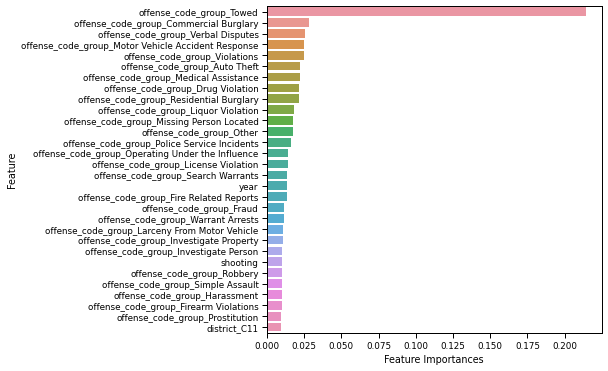

In [55]:
feature_importance_df(rexgb,x_train.columns,30,1)

From the model used, the most influential features include offense code and district

#### Hyper Parameter Tuning

Hyper parameter tuning aims to find the best parameters that minimize errors

1.	n_estimator
2.	max_depth, min_child_weight
3.	Gamma
4.	Colsample
5.	Regularization Parameter
6.	Learning rate , n_estimator

In [56]:
#load library
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

#building function
def tunning_result(alg):
    print('Best Parameter : \n', alg.best_params_,'\n')
    print('Best RMSE  : \n', -(alg.best_score_),'\n')

#### Tunning 1 : n_estimator

In [57]:
rexgb_tune = XGBRegressor(learning_rate=0.1,
                    #n_estimators=40, 
                    min_child_weight=3,
                    max_depth=5,
                    gamma=0.1,
                    colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune,threshold='median')

pipe = Pipeline([('select',select),('clf',rexgb_tune)])

kf5=KFold(n_splits=5)

# parameters
param_xgb = {
    'clf__n_estimators':[20,40,60,80],
}

rexgb_grid = GridSearchCV(pipe,
                          param_grid=param_xgb,
                          cv=kf5,scoring='neg_root_mean_squared_error')
rexgb_grid.fit(x_train,y_train)
tunning_result(rexgb_grid)

Best Parameter : 
 {'clf__n_estimators': 80} 

Best RMSE  : 
 5.942365435848627 



#### Tunning 2 : max_depth, min_child_weight

In [59]:
rexgb_tune2 = XGBRegressor(learning_rate=0.1,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    #min_child_weight=3,
                    #max_depth=5,
                    gamma=0.1,
                    colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune2,threshold='median')

pipe2 = Pipeline([('select',select),('clf',rexgb_tune2)])

kf5=KFold(n_splits=5)

# parameters
param_xgb2 = {
    'clf__max_depth':range(3,10,2),
    'clf__min_child_weight':range(1,8,2)
}

rexgb_grid2 = GridSearchCV(pipe2,
                          param_grid=param_xgb2,
                          cv=kf5)

rexgb_grid2.fit(x_train,y_train)
tunning_result(rexgb_grid2)

Best Parameter : 
 {'clf__max_depth': 9, 'clf__min_child_weight': 7} 

Best RMSE  : 
 -0.00890994095382125 



#### Tunning 3 : Gamma

In [60]:
rexgb_tune3 = XGBRegressor(learning_rate=0.25,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    min_child_weight=rexgb_grid2.best_params_['clf__min_child_weight'],
                    max_depth=rexgb_grid2.best_params_['clf__max_depth'],
                    #gamma=0.1,
                    subsample=0.9,
                    colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune3,threshold='median')

pipe3 = Pipeline([('select',select),('clf',rexgb_tune3)])

kf5=KFold(n_splits=5)

# parameters
param_xgb3 = {
    'clf__gamma':[0,0.01,0.1,0.3,0.5,1]}

rexgb_grid3 = GridSearchCV(pipe3,
                          param_grid=param_xgb3,
                          cv=kf5)

rexgb_grid3.fit(x_train,y_train)
tunning_result(rexgb_grid3)

Best Parameter : 
 {'clf__gamma': 0.1} 

Best RMSE  : 
 -0.008315821740805163 



#### Tuning 4 : Colsample

In [61]:
rexgb_tune4 = XGBRegressor(learning_rate=0.25,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    min_child_weight=rexgb_grid2.best_params_['clf__min_child_weight'],
                    max_depth=rexgb_grid2.best_params_['clf__max_depth'],
                    gamma=rexgb_grid3.best_params_['clf__gamma'],
                    #colsample_bytree=0.6,
                    reg_alpha=0.1,
                    reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune4,threshold='median')

pipe4 = Pipeline([('select',select),('clf',rexgb_tune4)])

kf5=KFold(n_splits=5)

# parameters
param_xgb4 = {
    'clf__colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1]
}

rexgb_grid4 = GridSearchCV(pipe4,
                          param_grid=param_xgb4,
                          cv=kf5)

rexgb_grid4.fit(x_train,y_train)
tunning_result(rexgb_grid4)

Best Parameter : 
 {'clf__colsample_bytree': 0.5} 

Best RMSE  : 
 -0.008553560597586806 



#### Tuning 5 : Regularization Parameter

In [62]:
rexgb_tune5 = XGBRegressor(learning_rate=0.25,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    min_child_weight=rexgb_grid2.best_params_['clf__min_child_weight'],
                    max_depth=rexgb_grid2.best_params_['clf__max_depth'],
                    gamma=rexgb_grid3.best_params_['clf__gamma'],
                    colsample_bytree=rexgb_grid4.best_params_['clf__colsample_bytree'],
                    #reg_alpha=0.1,
                    #reg_lambda=0.1,
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune5,threshold='median')

pipe5 = Pipeline([('select',select),('clf',rexgb_tune5)])

kf5=KFold(n_splits=5)

# parameters
param_xgb5 = {
    'clf__reg_alpha':[0.001,0.01,0.1,1,10,100],
    'clf__reg_lambda':[0.001,0.01,0.1,1,10,100]
}

rexgb_grid5 = GridSearchCV(pipe5,
                          param_grid=param_xgb5,
                          cv=kf5)

rexgb_grid5.fit(x_train,y_train)
tunning_result(rexgb_grid5)

Best Parameter : 
 {'clf__reg_alpha': 100, 'clf__reg_lambda': 0.001} 

Best RMSE  : 
 -0.009565189079306147 



#### Tunning 6 : Learning rate , n_estimator

In [63]:
rexgb_tune6 = XGBRegressor(#learning_rate=0.25,
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    min_child_weight=rexgb_grid2.best_params_['clf__min_child_weight'],
                    max_depth=rexgb_grid2.best_params_['clf__max_depth'],
                    gamma=rexgb_grid3.best_params_['clf__gamma'],
                    colsample_bytree=rexgb_grid4.best_params_['clf__colsample_bytree'],
                    reg_alpha=rexgb_grid5.best_params_['clf__reg_alpha'],
                    reg_lambda=rexgb_grid5.best_params_['clf__reg_lambda'],
                    random_state=10,
                    objective='reg:squarederror')

select = SelectFromModel(rexgb_tune6,threshold='median')

pipe6 = Pipeline([('select',select),('clf',rexgb_tune6)])

kf5=KFold(n_splits=5)

# parameters

param_xgb6 = {
    'clf__learning_rate':[0.25,0.12,0.1,0.05,0.01]}

rexgb_grid6 = GridSearchCV(pipe6,
                          param_grid=param_xgb6,
                          cv=kf5)

rexgb_grid6.fit(x_train,y_train)
tunning_result(rexgb_grid6)

Best Parameter : 
 {'clf__learning_rate': 0.12} 

Best RMSE  : 
 -0.010586355502034595 



#### Final Model

In [64]:
rexgb_final = XGBRegressor(learning_rate=rexgb_grid6.best_params_['clf__learning_rate'],
                    n_estimators=rexgb_grid.best_params_['clf__n_estimators'], 
                    min_child_weight=rexgb_grid2.best_params_['clf__min_child_weight'],
                    max_depth=rexgb_grid2.best_params_['clf__max_depth'],
                    gamma=rexgb_grid3.best_params_['clf__gamma'],
                    colsample_bytree=rexgb_grid4.best_params_['clf__colsample_bytree'],
                    reg_alpha=rexgb_grid5.best_params_['clf__reg_alpha'],
                    reg_lambda=rexgb_grid5.best_params_['clf__reg_lambda'],
                    random_state=10,
                    objective='reg:squarederror')

Final Model Performance

In [65]:
eval(rexgb_final,5,x_train, x_test)

,WMAPE_test,WMAPE_train,RMSE_test,RMSE_train,RMSE_CV_mean
0,34.2735,33.908,5.979133,5.924565,-5.936759


Our First Model Performance

In [66]:
eval(rexgb,5,x_train, x_test)

,WMAPE_test,WMAPE_train,RMSE_test,RMSE_train,RMSE_CV_mean
0,34.2525,33.3599,5.989338,5.841675,-5.952907


It can be seen that the performance of the model before and after parameter tuning is not significantly different, meaning that in this case, parameter tuning does not have a significant effect.

So, if you want to improve the performance of the model, you must deepen the feature engineering and E.D.A

#### Predict question data

Question : 

A detective named Shinichi Kudo is assigned the task of investigating the crime of vandalism in district D14. The crime took place last week on a Thursday in June. Approximately what time was the crime committed?

In [67]:
df_dummies_test

,year,month,shooting,offense_code_group_Aircraft,offense_code_group_Arson,offense_code_group_Assembly or Gathering Violations,offense_code_group_Auto Theft,offense_code_group_Auto Theft Recovery,offense_code_group_Ballistics,offense_code_group_Bomb Hoax,offense_code_group_Commercial Burglary,offense_code_group_Confidence Games,offense_code_group_Counterfeiting,offense_code_group_Criminal Harassment,offense_code_group_Disorderly Conduct,offense_code_group_Drug Violation,offense_code_group_Embezzlement,offense_code_group_Evading Fare,offense_code_group_Explosives,offense_code_group_Fire Related Reports,offense_code_group_Firearm Discovery,offense_code_group_Firearm Violations,offense_code_group_Fraud,offense_code_group_HOME INVASION,offense_code_group_HUMAN TRAFFICKING,offense_code_group_Harassment,offense_code_group_Harbor Related Incidents,offense_code_group_Homicide,offense_code_group_Investigate Person,offense_code_group_Investigate Property,offense_code_group_Landlord/Tenant Disputes,offense_code_group_Larceny,offense_code_group_Larceny From Motor Vehicle,offense_code_group_License Plate Related Incidents,offense_code_group_License Violation,offense_code_group_Liquor Violation,offense_code_group_Medical Assistance,offense_code_group_Missing Person Located,offense_code_group_Missing Person Reported,offense_code_group_Motor Vehicle Accident Response,offense_code_group_Offenses Against Child / Family,offense_code_group_Operating Under the Influence,offense_code_group_Other,offense_code_group_Other Burglary,offense_code_group_Phone Call Complaints,offense_code_group_Police Service Incidents,offense_code_group_Prisoner Related Incidents,offense_code_group_Property Found,offense_code_group_Property Lost,offense_code_group_Property Related Damage,offense_code_group_Prostitution,offense_code_group_Recovered Stolen Property,offense_code_group_Residential Burglary,offense_code_group_Restraining Order Violations,offense_code_group_Robbery,offense_code_group_Search Warrants,offense_code_group_Service,offense_code_group_Simple Assault,offense_code_group_Towed,offense_code_group_Vandalism,offense_code_group_Verbal Disputes,offense_code_group_Violations,offense_code_group_Warrant Arrests,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,district_A15,district_A7,district_B2,district_B3,district_C11,district_C6,district_D14,district_D4,district_E13,district_E18,district_E5,district_External,district_Other
0,2021,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [68]:
np.round(rexgb_final.predict(df_dummies_test)).tolist()

[15.0]

Using the ML model that is owned, based on these criteria, it is obtained that the probability that this case will occur is at 15 PM

#### Conclusion and Recommendation

Predictive analysis on this notebook still requires several actions to improve accuracy and minimize errors. Among them

1. More EDA
2. More feature engineering
3. Comparing several models

However, due to time constraints, this has not been done yet. This can be a suggestion for further analysis